## Confusion Matrix


---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* [Chulalongkorn Business School, Thailand](https://www.cbs.chula.ac.th/en/home/)
---


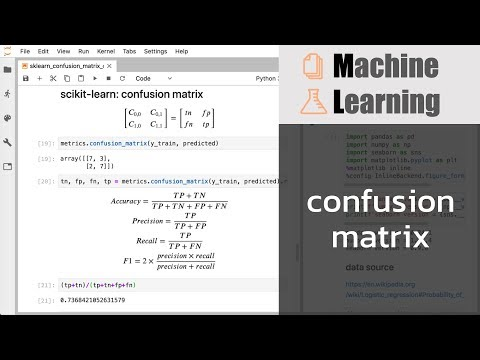

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("-ghTyCXxPm4", width=720, height=405)



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")
print(f"seaborn version = {sns.__version__}")



pandas  version = 1.0.3
numpy   version = 1.18.1
seaborn version = 0.10.0


In [4]:
pd.Timestamp.now()


Timestamp('2020-04-01 07:55:31.378510')

### data source

https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study


In [5]:
df = pd.read_csv(
    "https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv"
)
df.T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


C:\Users\prasert\Miniconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


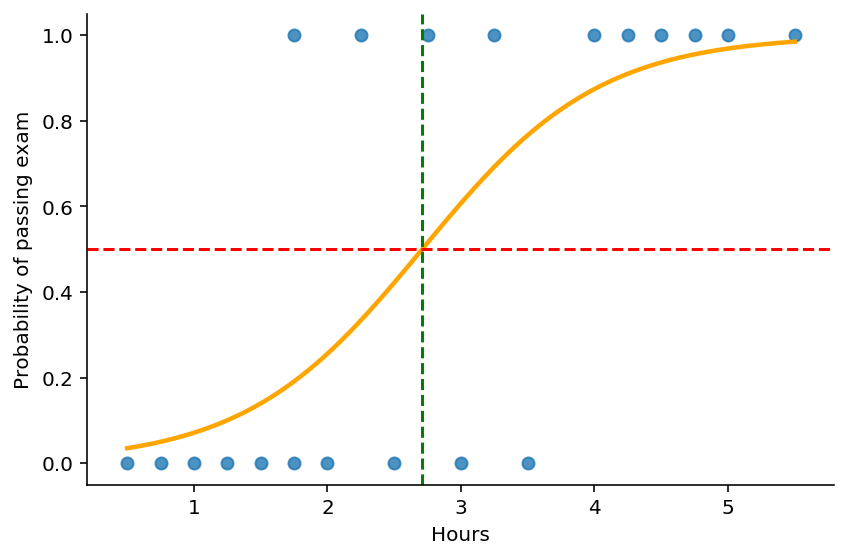

In [6]:
sns.lmplot(
    x="Hours",
    y="Pass",
    data=df,
    logistic=True,
    height=4,
    aspect=1.5,
    line_kws={"color": "orange"},
)
plt.ylabel("Probability of passing exam")
plt.axvline(2.71, color="green", linestyle="--")
plt.axhline(0.5, color="red", linestyle="--")



# Scikit-learn: LogisticRegression

doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [7]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [8]:
print(f"sklearn version = {sklearn.__version__}")


sklearn version = 0.22.1


In [9]:
test_size = 0.3
# test_size=0
X_train, X_test, y_train, y_test = train_test_split(
    df[["Hours"]], df.Pass, test_size=test_size, random_state=3
)



In [10]:
X_train  # pandas DataFrame



,Hours
6,1.75
7,2.00
15,4.25
12,3.25
9,2.50
11,3.00
19,5.50
18,5.00
13,3.50
5,1.75


In [11]:
y_train  # pandas Series



6     1
7     0
15    1
12    1
9     0
11    0
19    1
18    1
13    0
5     0
0     0
8     1
3     0
10    1
Name: Pass, dtype: int64

In [12]:
model = LogisticRegression(solver="lbfgs")
# model = LogisticRegression(C = 1e10, solver='lbfgs') # disable regularization
model


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
model.score(X_test, y_test)  # accuracy of the model



1.0

In [15]:
predicted = model.predict(X_train)
predicted


array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
y_train.values


array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

## Confusion matrix


In [17]:
from sklearn import metrics

# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, f1_score


### further reading:

-   https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
-   https://en.wikipedia.org/wiki/Confusion_matrix


In [18]:
X_train["Hours"].values



array([1.75, 2.  , 4.25, 3.25, 2.5 , 3.  , 5.5 , 5.  , 3.5 , 1.75, 0.5 ,
       2.25, 1.25, 2.75])

In [19]:
y_train.values


array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [20]:
predicted


array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

## scikit-learn: confusion matrix

$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

<table>
<tr>
    <td></td>
    <td>predicted false</td>
    <td>predicted true</td>
</tr>
<tr>
    <td>actual false</td>
    <td>tn</td>
    <td>fp</td>
</tr>
<tr>
    <td>actual true</td>
    <td>fn</td>
    <td>tp</td>
</tr>
<table>


In [21]:
metrics.confusion_matrix(y_train, predicted)


array([[5, 2],
       [3, 4]], dtype=int64)

In [22]:
df_cf = pd.DataFrame(
    metrics.confusion_matrix(y_train, predicted),
    columns=["pred_fail", "pred_pass"],
    index=["actual_fail", "actual_pass"],
)
df_cf


,pred_fail,pred_pass
actual_fail,5,2
actual_pass,3,4


In [23]:
def pretty_confusion_matrix(
    cm_array,
    index_labels=["actual_neg", "actual_positive"],
    col_labels=["pred_neg", "pred_positive"],
):
    """
    add labels and grand total to sklearn confusion matrix (2 x 2)
    """
    df = pd.DataFrame(cm_array, index=index_labels, columns=col_labels)

    index_labels = df.index.tolist()
    df = df.append(df.sum(axis=0), ignore_index=True)
    df.index = index_labels + ["total"]
    df["total"] = df.sum(axis=1)
    return df


In [24]:
pretty_confusion_matrix(metrics.confusion_matrix(y_train, predicted))


,pred_neg,pred_positive,total
actual_neg,5,2,7
actual_positive,3,4,7
total,8,6,14


In [25]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, predicted).ravel()


In [26]:
print(f"tn = {tn}")
print(f"fp = {fp}")
print(f"fn = {fn}")
print(f"tp = {tp}")



tn = 5
fp = 2
fn = 3
tp = 4


$$
Accuracy={\frac {{TP+TN} }{TP + TN +FP + FN} }\\
Precision={\frac {TP}{TP+FP}}\\
Recall={\frac {TP}{TP+FN}}\\
F1 = 2 \times {\frac {precision \times recall} {precision + recall}}
$$


In [27]:
metrics.accuracy_score(y_train, predicted)


0.6428571428571429

In [28]:
metrics.precision_score(y_train, predicted)


0.6666666666666666

In [29]:
metrics.recall_score(y_train, predicted)


0.5714285714285714

In [30]:
metrics.f1_score(y_train, predicted)


0.6153846153846153

In [31]:
print(metrics.classification_report(y_train, predicted))


              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.67      0.57      0.62         7

    accuracy                           0.64        14
   macro avg       0.65      0.64      0.64        14
weighted avg       0.65      0.64      0.64        14



In [32]:
metrics.precision_recall_fscore_support(y_train, predicted)


(array([0.625     , 0.66666667]),
 array([0.71428571, 0.57142857]),
 array([0.66666667, 0.61538462]),
 array([7, 7], dtype=int64))

In [33]:
tp / (tp + fp)  # precision (class = 1)



0.6666666666666666

In [34]:
tp / (tp + fn)  # recall (class = 1)



0.5714285714285714

In [35]:
tn / (tn + fn)  # precision (class = 0)



0.625

In [36]:
tn / (tn + fp)  # recall (class = 0)



0.7142857142857143